In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-31 00:00:00+09:00,27614.640625,27692.550781,27032.019531,27199.740234,270300000,0.0,0.0
2022-11-07 00:00:00+09:00,27406.779297,28329.539062,27357.529297,28263.570312,423200000,0.0,0.0
2022-11-14 00:00:00+09:00,28277.640625,28305.039062,27743.150391,27899.769531,353200000,0.0,0.0
2022-11-21 00:00:00+09:00,27982.000000,28502.289062,27846.300781,28283.029297,273100000,0.0,0.0
2022-11-28 00:00:00+09:00,28220.560547,28423.460938,27662.119141,27777.900391,386800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-30 00:00:00+09:00,39117.828125,39126.359375,37651.070312,38635.621094,710200000,0.0,0.0
2024-10-07 00:00:00+09:00,39239.921875,39668.929688,38817.539062,39605.800781,569600000,0.0,0.0
2024-10-14 00:00:00+09:00,40047.148438,40257.339844,38893.519531,38981.750000,440000000,0.0,0.0


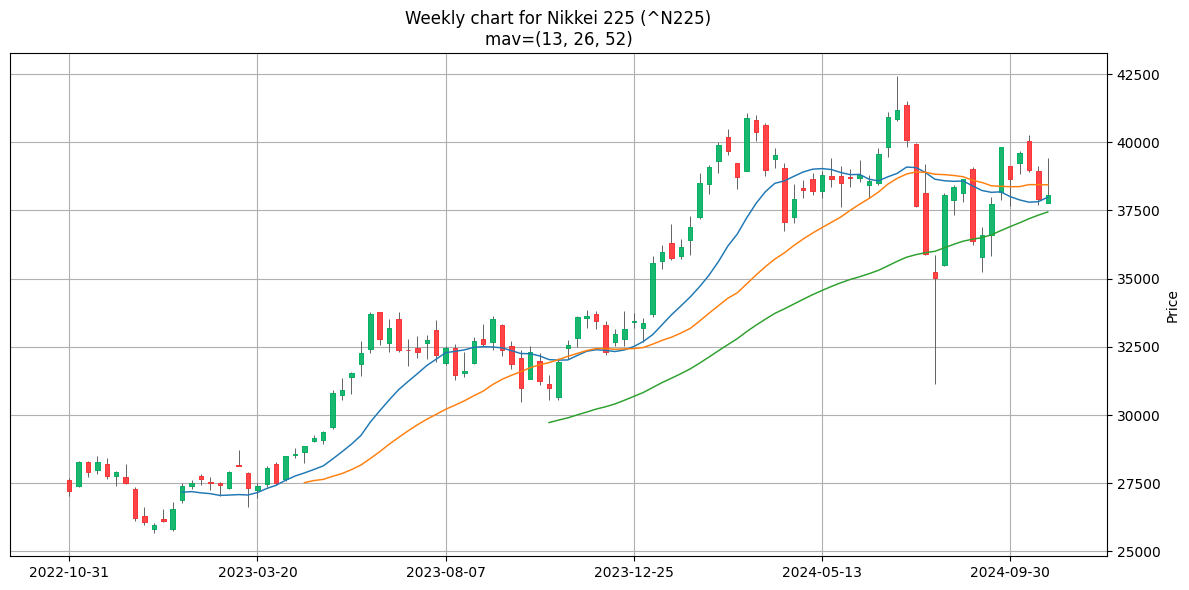

In [8]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='yahoo',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [3]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-21 00:00:00+09:00,38960.199219,39119.671875,37712.191406,37913.921875,504200000,0.0,0.0
2024-10-28 00:00:00+09:00,37757.949219,39417.878906,37757.949219,38053.671875,580100000,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-10-21 00:00:00+09:00    37913.921875
2024-10-28 00:00:00+09:00    38053.671875
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-10-21 00:00:00+09:00       NaN
2024-10-28 00:00:00+09:00    139.75
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(26).mean()

Date
2022-10-31 00:00:00+09:00             NaN
2022-11-07 00:00:00+09:00             NaN
2022-11-14 00:00:00+09:00             NaN
2022-11-21 00:00:00+09:00             NaN
2022-11-28 00:00:00+09:00             NaN
                                 ...     
2024-09-30 00:00:00+09:00    38369.124099
2024-10-07 00:00:00+09:00    38372.287560
2024-10-14 00:00:00+09:00    38445.879808
2024-10-21 00:00:00+09:00    38445.078275
2024-10-28 00:00:00+09:00    38438.062951
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2022-10-31 00:00:00+09:00             NaN
2022-11-07 00:00:00+09:00             NaN
2022-11-14 00:00:00+09:00             NaN
2022-11-21 00:00:00+09:00             NaN
2022-11-28 00:00:00+09:00             NaN
                                 ...     
2024-09-30 00:00:00+09:00    36905.840820
2024-10-07 00:00:00+09:00    37046.029485
2024-10-14 00:00:00+09:00    37194.536997
2024-10-21 00:00:00+09:00    37327.656851
2024-10-28 00:00:00+09:00    37445.037260
Name: Close, Length: 105, dtype: float64